<font color=2874A6 size = 20 face="Arial">Machine Learning Project 4DS6  </font>

Groupe3 :

Nasri Chirine

Mazigh Arij

Dekhil Nour

Medimegh Mohamed

BenMoussa Yessine

Bechaib Mokhtar


<font color=#6C3483 size = 8>I. Business understanding:

  
  
  <font color=#0B5345 size = 12 face="Georgia"> Project's presentation </font>

<style>
.hi
{
color :purple;

}
</style>

The dataset used in this project contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

<font color=#0B5345 size = 12 face="Georgia"> Content </font>
 
 There are 25 variables in our dataset:
 
<font color=#196F3D>ID:</font> ID of each client

<font color=#196F3D>X1:</font> Amount of given credit in NT dollars

<font color=#196F3D>X2:</font> Gender (1=male, 2=female)

<font color=#196F3D>X3:</font> (1=graduate school, 2=university, 3=high school, 0,4,5,6=others)

<font color=#196F3D>X4:</font> Marital status (1=married, 2=single, 3=divorced , 0=others)

<font color=#196F3D>X5:</font> Age in years

<font color=#196F3D>X6:</font> Repayment status in September 2005 (-2=No consumption,-1=paid in full, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

<font color=#196F3D>X7:</font> Repayment status in August 2005 (scale same as above)

<font color=#196F3D>X8:</font> Repayment status in July 2005 (scale same as above)

<font color=#196F3D>X9:</font> Repayment status in June 2005 (scale same as above)

<font color=#196F3D>X10:</font> Repayment status in May 2005 (scale same as above)

<font color=#196F3D>X11:</font> Repayment status in April 2005 (scale same as above)

<font color=#196F3D>X12:</font> Amount of bill statement in September 2005 (NT dollar)

<font color=#196F3D>X13:</font> Amount of bill statement in August 2005 (NT dollar)

<font color=#196F3D>X14:</font> Amount of bill statement in July 2005 (NT dollar)

<font color=#196F3D>X15:</font> Amount of bill statement in June 2005 (NT dollar)

<font color=#196F3D>X16:</font> Amount of bill statement in May 2005 (NT dollar)

<font color=#196F3D>X17:</font> Amount of bill statement in April 2005 (NT dollar)

<font color=#196F3D>X18:</font> Amount of previous payment in September 2005 (NT dollar)

<font color=#196F3D>X19:</font> Amount of previous payment in August 2005 (NT dollar)

<font color=#196F3D>X20:</font> Amount of previous payment in July 2005 (NT dollar)

<font color=#196F3D>X21:</font> Amount of previous payment in June 2005 (NT dollar)

<font color=#196F3D>X22:</font> Amount of previous payment in May 2005 (NT dollar)

<font color=#196F3D>X23:</font> Amount of previous payment in April 2005 (NT dollar)

<font color=#196F3D>Y:</font> Default payment (1=yes, 0=no)

<font color=#6C3483 size = 8> II. Data understanding

In [1]:
#Library import
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
import xlrd
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
# We chose the first header (the one with X's)
dataset = pd.read_csv('dataframe.csv',skiprows=[1])
dataset

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
#diplaying the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

In [4]:
# Displaying statistics 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
X3,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
X4,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
X5,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
X6,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
X7,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
X8,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
X9,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<font color=#010190 size = 4> We can observe the huge range of 'X1'. That's why centring the data is needed in the next steps

In [5]:
#checking if there's any NaN values
dataset.isnull().values.any()

False

<font color=#010190 size = 4> The ID column has no impact on the default payment that's why we will remove it since it only identifies the dataframe's lines.

In [6]:
dataset.index = dataset['ID']
dataset.drop('ID',axis=1,inplace=True)

<font color=#0B5345 size = 12 face="Georgia"> Exploratory Data Analysis </font>

<font color=#5499C7 size = 5> Distrubition by Default payment "Y" </font>

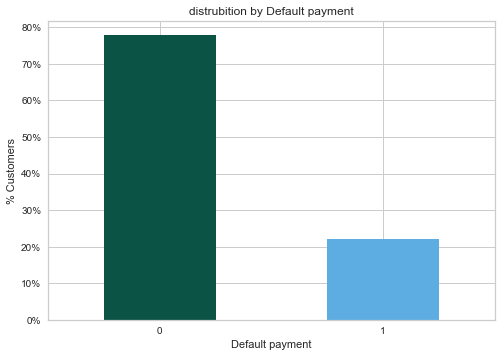

In [7]:

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#0B5345','#5DADE2']
ax = (dataset['Y'].value_counts()*100.0 /len(dataset)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Default payment')
ax.set_ylabel('% Customers')
ax.set_title('distrubition by Default payment')

#creating the list
totals = []

#finding the values and adding them to the list
for i in ax.patches:
    totals.append

<font color=#010190 size = 4> We can observe that more than 20% of Customers are defaulted.

<font color=#5499C7 size = 5> Distribution by X1: Amount of the given credit </font>

<AxesSubplot:xlabel='X1', ylabel='count'>

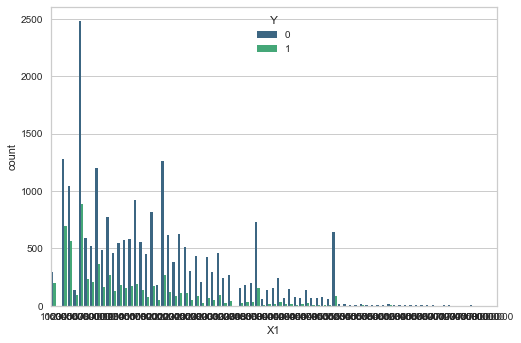

In [8]:
sns.countplot(x='X1' ,data=dataset,hue="Y", palette="viridis")

<font color=#010190 size = 4> We can observe that the giving credit for non defaulted customers is remarkably more important than the giving credit for defaulted customers.

<font color=#5499C7 size = 5>  Amount of Given Credit (LIMIT_BAL = X1) </font>

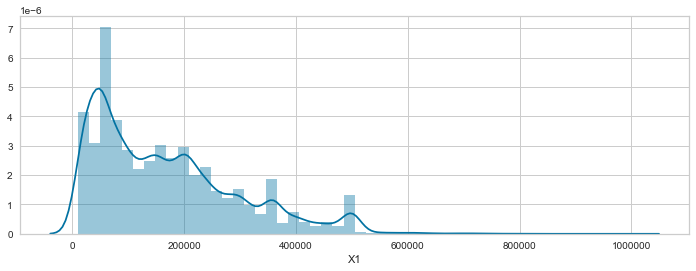

In [9]:
plt.figure(figsize=(12,4))

sns.distplot(dataset['X1'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

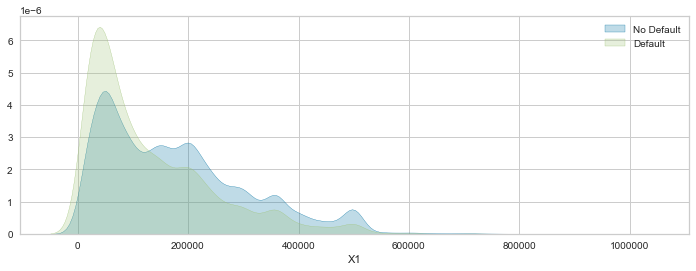

In [10]:
plt.figure(figsize=(12,4))

sns.kdeplot(dataset.loc[(dataset['Y'] == 0), 'X1'], label = 'No Default', shade = True)
sns.kdeplot(dataset.loc[(dataset['Y'] == 1), 'X1'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

<font color=#010190 size = 4> Most customers have 200k or less of credit limit. And it seems that we will find a higher concentration of customers in default on that range. We will split it into bins to get a clear look.

<font color=#5499C7 size = 5> Distribution by X2 : Gender </font>

<AxesSubplot:xlabel='X2', ylabel='count'>

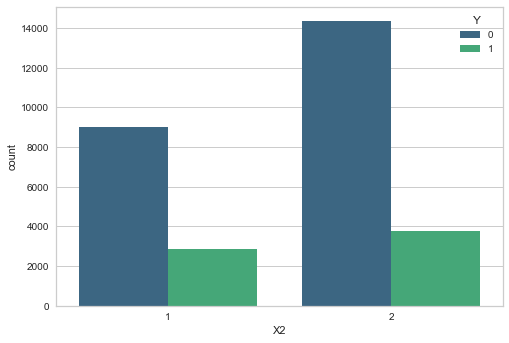

In [11]:
sns.countplot(x='X2' ,data=dataset,hue="Y", palette="viridis")

<font color=#010190 size = 4> The gender female has higher pourcentage of default payments and non default payments.

<font color=#5499C7 size = 5> Distribution by X3 : Education </font>

<AxesSubplot:xlabel='X3', ylabel='count'>

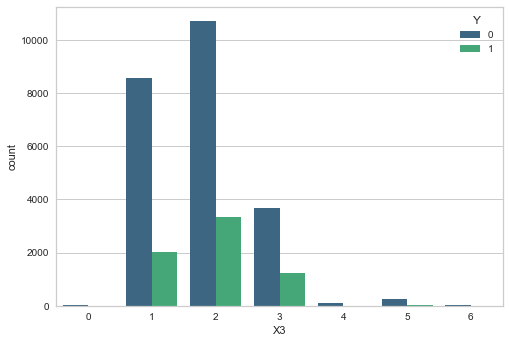

In [12]:
sns.countplot(x='X3' ,data=dataset,hue="Y", palette="viridis")

<font color=#010190 size = 4> We noticed that the values 0,4,5,6 in X3 are all in the cathegory OTHERS so we decided to replace them with one value which is 0 

In [13]:
dataset['X3'].replace(to_replace=[4, 5, 6], value=0, inplace=True)

<font color=#5499C7 size = 5>Comparing X3 :education level of clients  by Y: default payment 

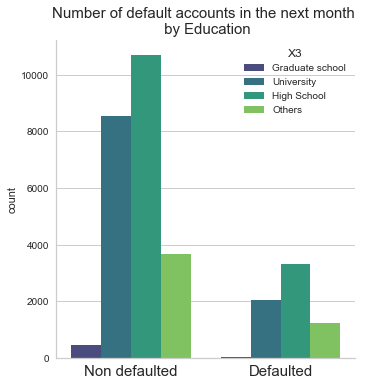

In [14]:
g=sns.catplot(x ="Y", hue='X3',
kind ="count",data = dataset,legend_out=False,palette = 'viridis')
plt.title('Number of default accounts in the next month \n by Education', fontsize=15)
locs, labels=plt.xticks()
new_xticks = ['Non defaulted', 'Defaulted']
plt.xticks(locs, new_xticks,fontsize=15)
plt.xlabel('')
new_labels = ['Graduate school','University','High School', 'Others']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

<font color=#010190 size = 4> Most of the non defaulted clients are high school graduated the same as defaulted.that's why X3 can't be a good feature in prediction .

<font color=#5499C7 size = 5> Comparing Marital Status "X4" of clients by default payment "Y" </font> 

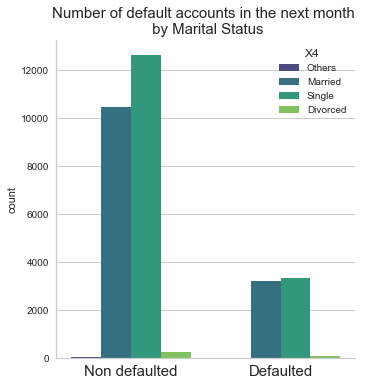

In [15]:
g=sns.catplot(x ="Y", hue='X4',
kind ="count",data = dataset,legend_out=False,palette = 'viridis')
plt.title('Number of default accounts in the next month \n by Marital Status', fontsize=15)
locs, labels=plt.xticks()
new_xticks = ['Non defaulted', 'Defaulted']
plt.xticks(locs, new_xticks,fontsize=15)
plt.xlabel('')
new_labels = ['Others','Married', 'Single', 'Divorced']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

<font color=#010190 size = 4> Most of the Non defaulted customers are single the same as defaulted.

<font color=#5499C7 size = 5> Distrubition of X5 : Age </font>

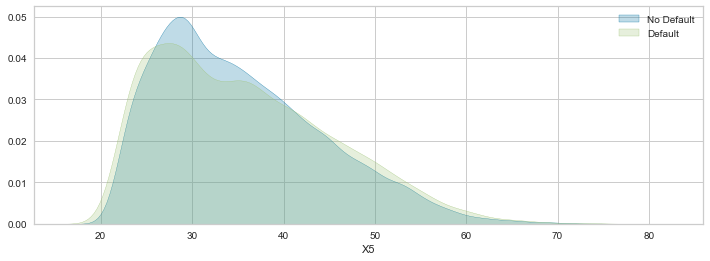

In [16]:
plt.figure(figsize=(12,4))

sns.kdeplot(dataset.loc[(dataset['Y'] == 0), 'X5'], label = 'No Default', shade = True)
sns.kdeplot(dataset.loc[(dataset['Y'] == 1), 'X5'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

<font color=#010190 size = 4> Most people in our dataset are between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower.

<font color=#5499C7 size = 5> Histograms of X6 => X11 </font>

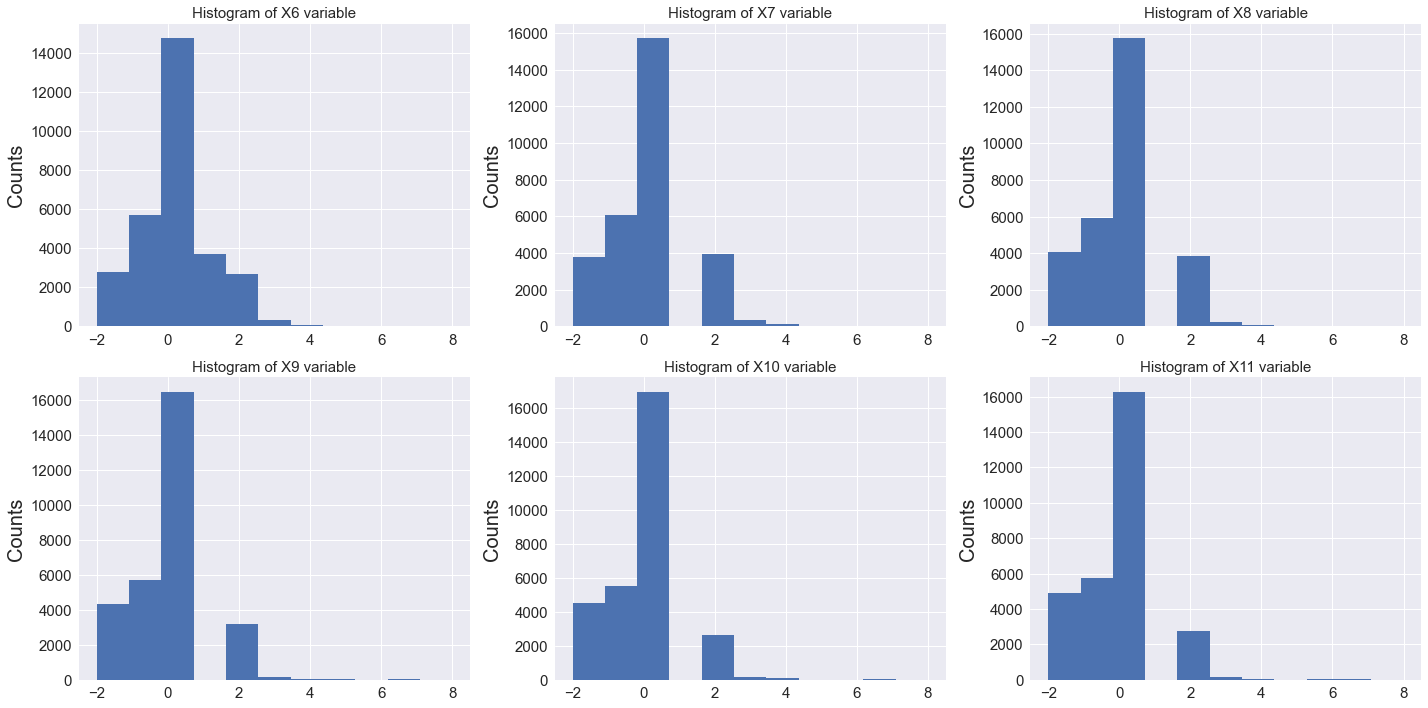

In [17]:
# set up the figure size
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (2 rows and 2 columns)
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest
# The pay status features are columns 6 through 11 inclusive
pay_features = dataset.columns[5:11]

# Use variables as x-axis labels and 'Counts' as y-axis labels
xaxes = pay_features


# draw histograms
# we can then use enumerate on axes.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dataset[pay_features[idx]].dropna(), bins=11)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title("Histogram of {} variable".format(xaxes[idx]),fontsize=15)

plt.tight_layout()
plt.show()

<font color=#010190 size = 4> Except for the X6, all of the histograms have missed values in 1, meaning they have a delay in payment of more than one month.
We also observe that all of the histograms show a very high values in 0 which means that the customers are  using the revolving payment.


<font color=#5499C7 size = 5> Histograms of X12 => X17 </font>

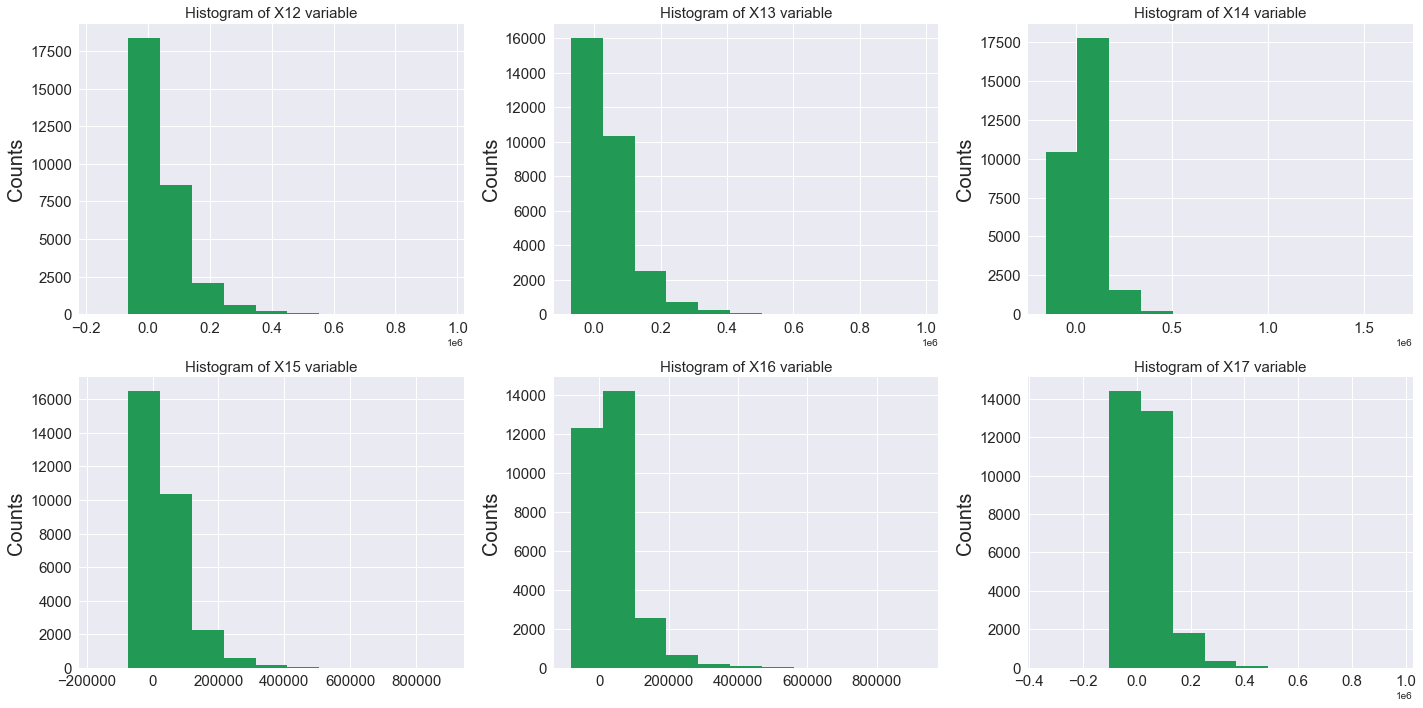

In [18]:
# set up the figure size
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (2 rows and 2 columns)
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest
# The pay status features are columns 6 through 11 inclusive
bill_features = dataset.columns[11:17]

# Use variables as x-axis labels and 'Counts' as y-axis labels
xaxes = bill_features


# draw histograms
# we can then use enumerate on axes.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dataset[bill_features[idx]].dropna(), bins=11 , color="#229954")
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title("Histogram of {} variable".format(xaxes[idx]),fontsize=15)

plt.tight_layout()
plt.show()

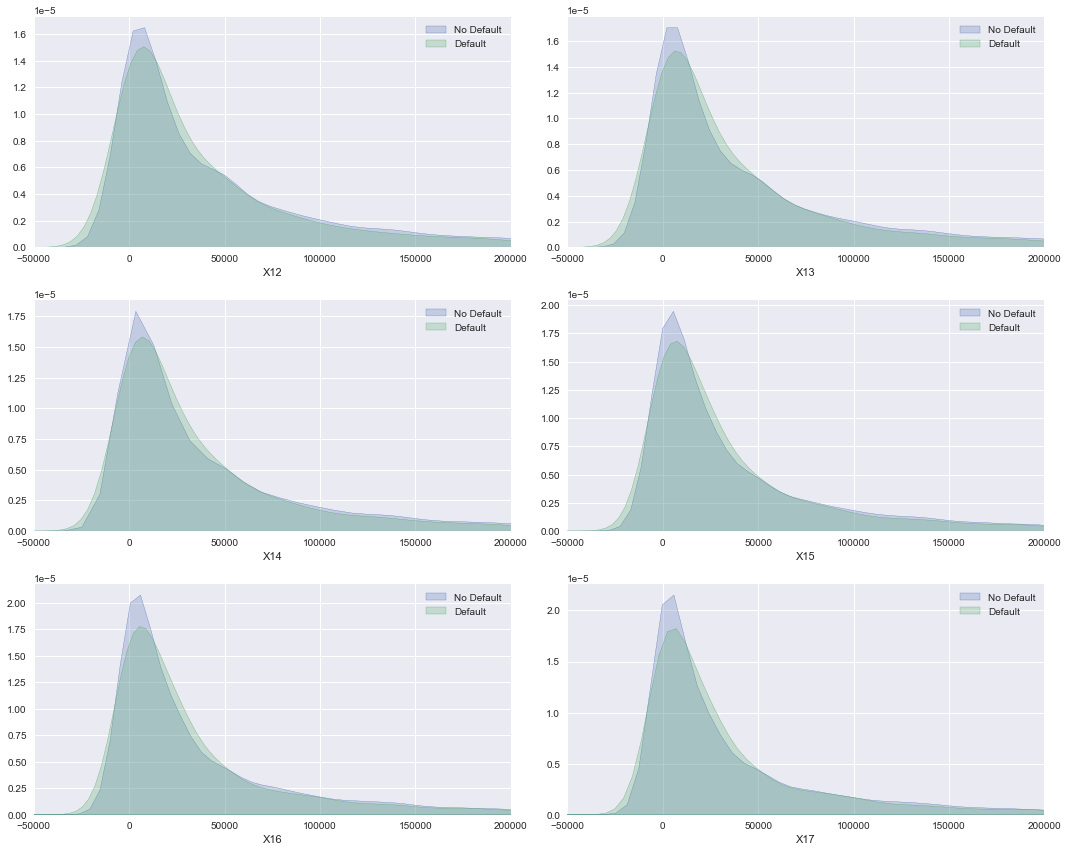

In [19]:
plt.figure(figsize=(15,12))
bill_amtx_fts = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(dataset.loc[(dataset['Y'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(dataset.loc[(dataset['Y'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

<font color=#5499C7 size = 5> Histograms of X18 => X23 </font>

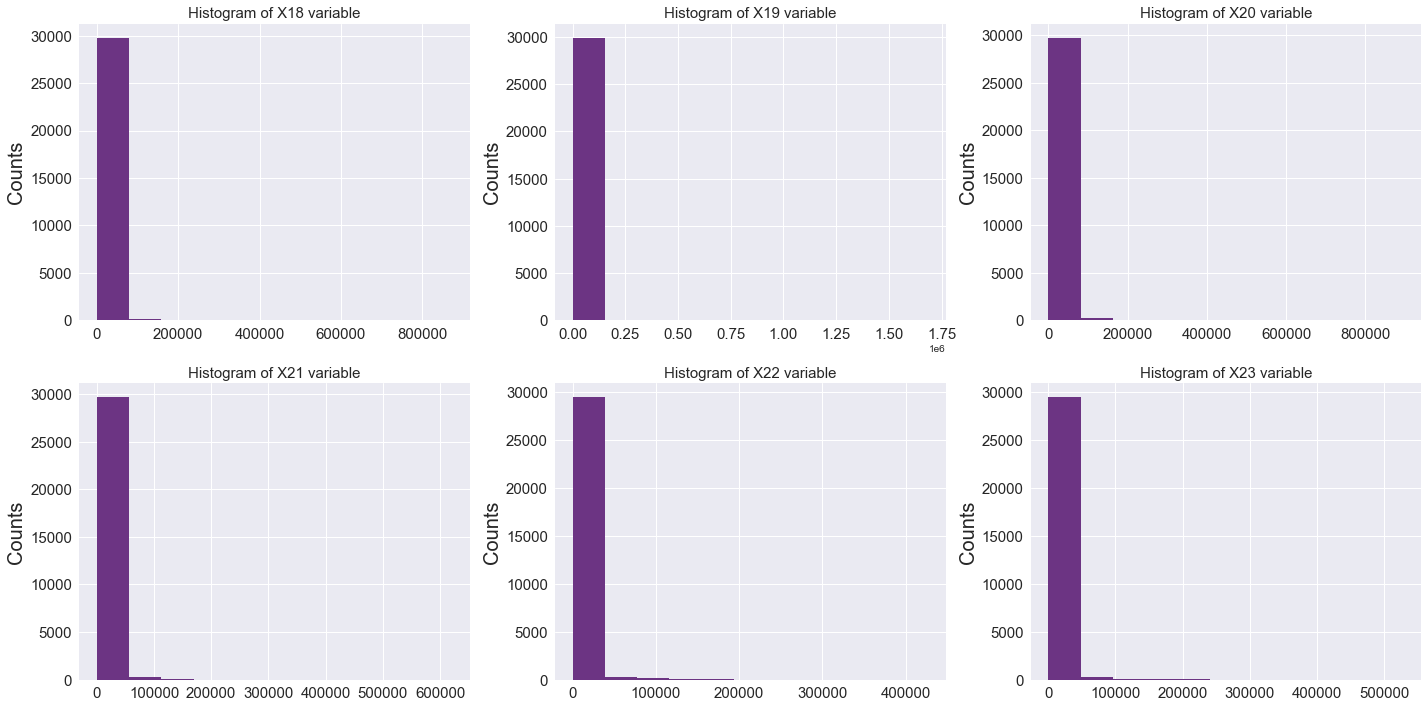

In [20]:
# set up the figure size
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (2 rows and 2 columns)
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest

pay_amt_features = dataset.columns[17:23]

# Use variables as x-axis labels and 'Counts' as y-axis labels
xaxes = pay_amt_features


# draw histograms
# we can then use enumerate on axes.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dataset[pay_amt_features[idx]].dropna(), bins=11 , color="#6C3483")
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title("Histogram of {} variable".format(xaxes[idx]),fontsize=15)

plt.tight_layout()
plt.show()

In [21]:
dataset[pay_amt_features].describe()

,X18,X19,X20,X21,X22,X23
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


<font color=#010190 size = 4> we observe that all the values are around 0, that's why we need to use log10 for more significant histograms.

In [22]:
pay_zero = dataset[pay_amt_features] == 0
dataset2 = dataset[pay_amt_features][~pay_zero].apply(np.log10)
dataset2.describe()

,X18,X19,X20,X21,X22,X23
count,24751.000000,24604.000000,24032.000000,23592.000000,23297.000000,22827.000000
mean,3.489180,3.474214,3.405344,3.355209,3.372449,3.385273
std,0.536241,0.551789,0.581360,0.604928,0.585085,0.589670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.206826,3.176670,3.079453,3.000000,3.000000,3.000000
50%,3.477121,3.477121,3.397766,3.342423,3.361728,3.377670
75%,3.778513,3.778151,3.721336,3.698970,3.698970,3.699144
max,5.941289,6.226409,5.952327,5.793092,5.629949,5.723181


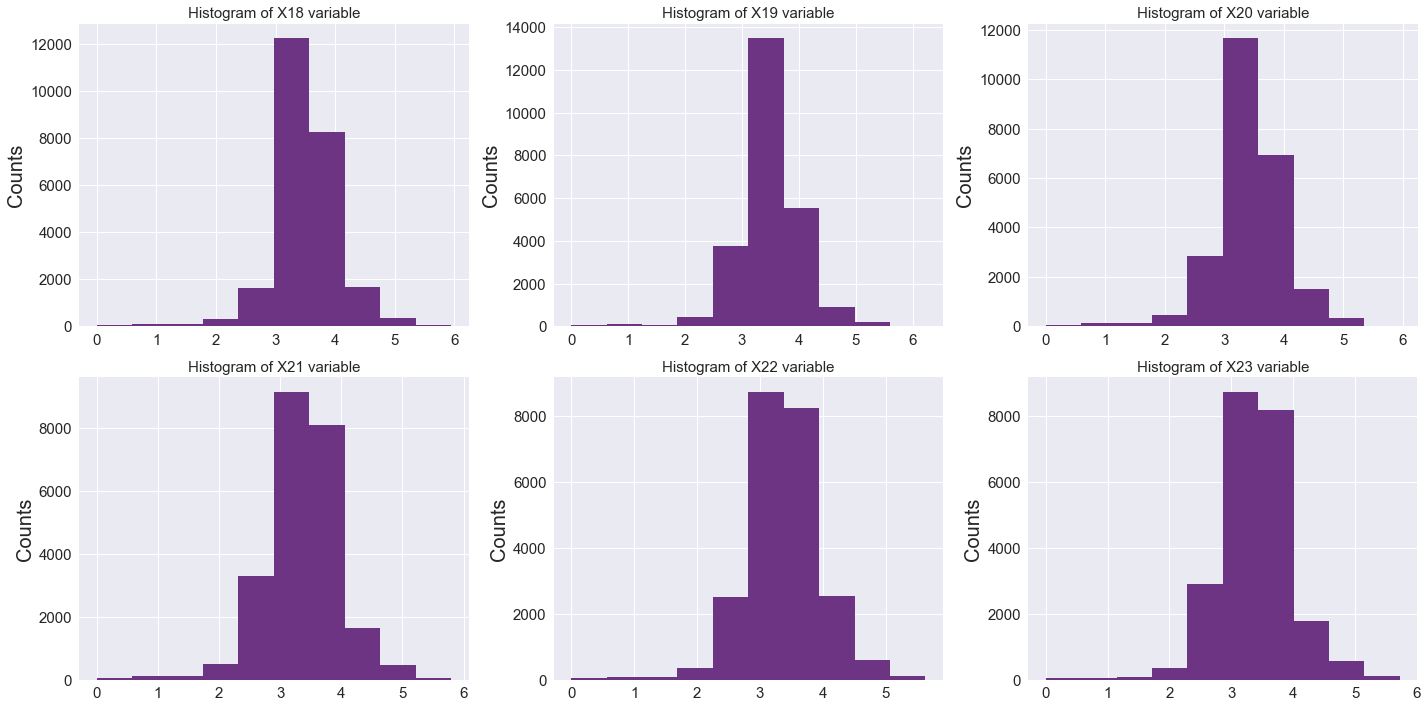

In [23]:
# set up the figure size
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (2 rows and 2 columns)
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest

pay_amt_features = dataset.columns[17:23]

# Use variables as x-axis labels and 'Counts' as y-axis labels
xaxes = pay_amt_features


# draw histograms
# we can then use enumerate on axes.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(dataset2[pay_amt_features[idx]].dropna(), bins=10 , color="#6C3483")
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title("Histogram of {} variable".format(xaxes[idx]),fontsize=15)

plt.tight_layout()
plt.show()

<font color=#010190 size = 4> We can observe that most of costumers have high values in the amount of previous payment in August (X19) meaning the payment in July is the most important which is expected since the amount of bill statement in July (X14) is the highest.

<font color=#6C3483 size = 8> III. Data preparation 

<font color=#0B5345 size = 12 face="Georgia"> Feature selection
</Font>



<font color=#5499C7 size = 5> Observation of the corealation between the dataset and the features

<AxesSubplot:title={'center':'Correlation of features with  Y (Default)'}>

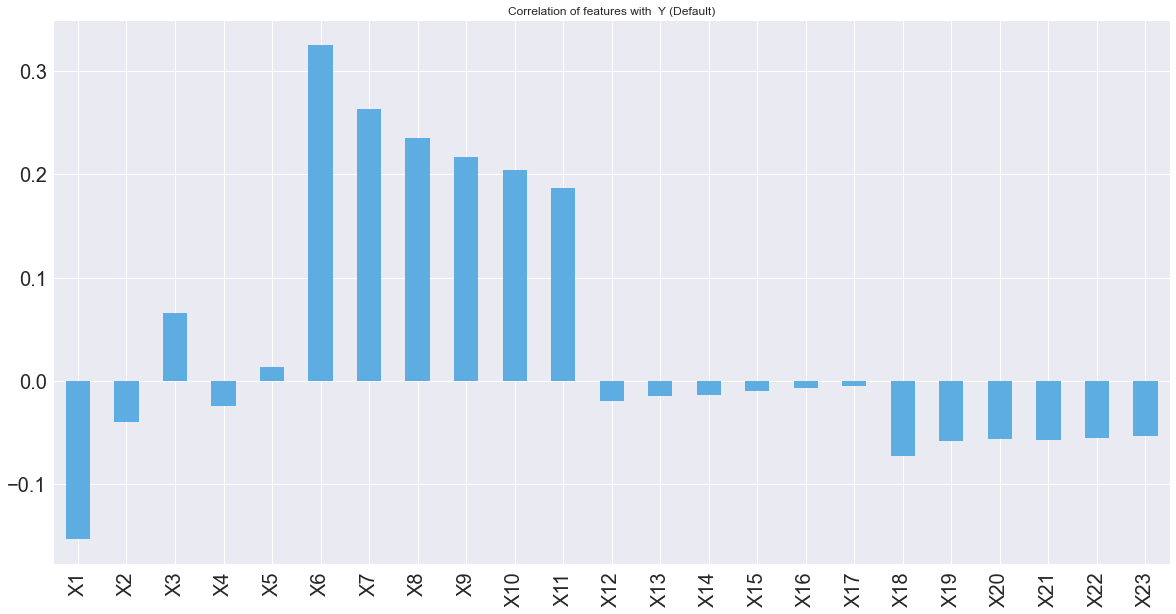

In [24]:
T = dataset.drop(['Y'] , axis=1)
T.corrwith(dataset['Y']).plot.bar(color="#5DADE2",figsize = (20, 10), title = "Correlation of features with  Y (Default)",
                                        fontsize = 20,rot = 90, grid = True)

<font color=#010190 size = 4> The strongest predictors are from X6 to X11,X1 and also from  X18 to X23.

<AxesSubplot:>

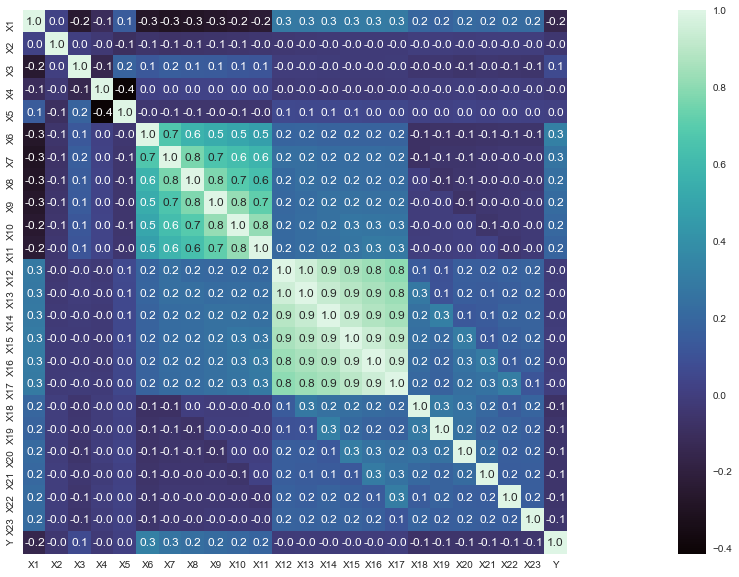

In [25]:
coorelation = dataset.corr()
plt.subplots(figsize=(40,10))
sns.heatmap(coorelation,square=True,annot=True,fmt=".1f",cmap="mako")

<font color=#010190 size = 4> We have quite a few positive correlations 

<font color=#010190 size = 4> The amounts of bill statement (X12, X13, X14, X15, X16, X17) are positevely correlated with each other.

<font color=#010190 size = 4> The history of past payments (X6, X7, X8, X9, X10, X11) are also positevely correlated whith each other beacause logically, if they are late on one payment, they are propably late on others and vice versa.

<font color=#010190 size = 4> Marital status (X4) is a nominal feature: we can't really observe correlations because there's no ordering between the values. A high value for  marriage doesn't mean anything.

<font color=#010190 size = 4> Every other thing seems uncorrelated.

<font color=#010190 size = 4> For the default payment next month (Y), we see that we have no real strong correlations with what we are trying to predict, because having a good performance of our model is not related to a single column or a few columns but it's a result of combination of all of them.

<Font color="mercure" size = 5>
Conclusion :
</Font>
<font color=#010190 size = 4> We can conclude from the histograms that X6 has the most precise data.
we have already deleted the ID column.
<font color=#010190 size = 4>
    we will also delete the gender "X2" column because the banks cannot
determine creditworthiness with gender.

In [26]:
# Specify X to be the feature columns only, and y to be the target column

X = dataset.drop(['X2','Y'], axis=1)
# Specify y to be the target column
y = dataset['Y']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.75,
                                                    random_state=42,
                                                    stratify=y)

<font color=#5499C7 size = 5>Importance of all the features based on pi-value</font>

In [27]:

[f_stat, f_p_value] = f_classif(X_train, y_train)
f_test_df = pd.DataFrame({'Feature':X_train.columns,

                          'p value':f_p_value})

print('The top 15 features sorted by p value:')
f_test_df.sort_values('p value')[:15]

The top 15 features sorted by p value:


,Feature,p value
4,X6,0.000000e+00
5,X7,0.000000e+00
6,X8,1.794055e-289
7,X9,9.354583e-243
8,X10,3.562851e-211
9,X11,2.378224e-180
0,X1,1.052712e-127
16,X18,2.454277e-27
17,X19,4.591267e-23
1,X3,4.458989e-22


<font color=#010190 size = 4> We can see that all the features that we deduced important are in the top of the list

<font color=#5499C7 size = 5> Feature Selection using Logistic Regression </font>

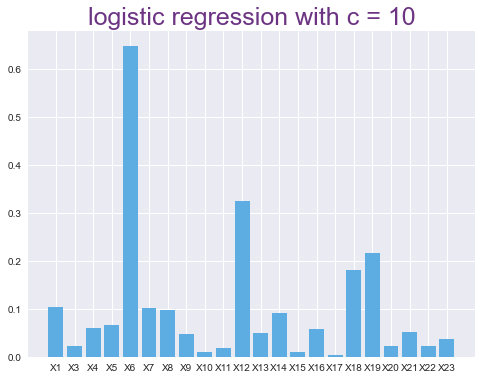

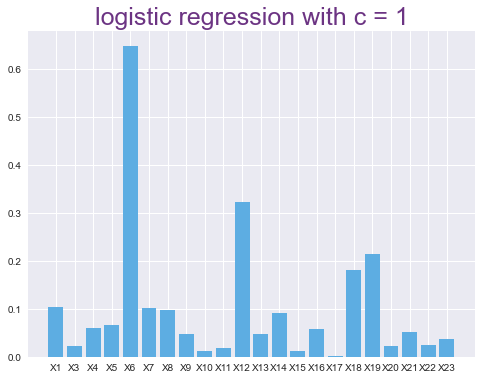

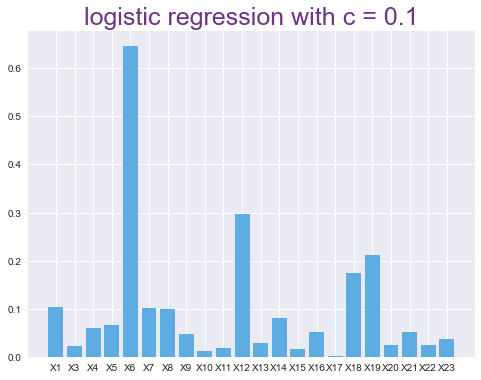

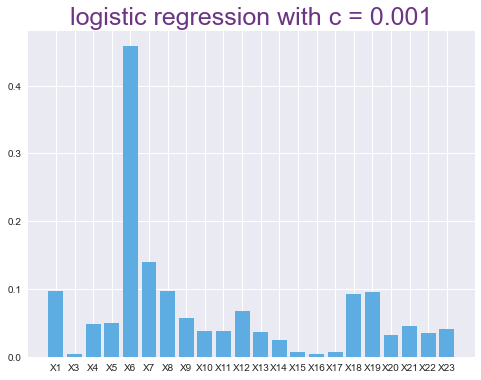

In [28]:

#Initiate the scaler
scaler = StandardScaler()
#fit and transform the data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

#Set the hyperparmaters
C=[10, 1 , .1,.001]
for c in C:
    clf = LogisticRegression(penalty='l2',C=c,max_iter=10000)
    clf.fit(X_train_std,y_train)
    D=dict(zip(X_train.columns, abs(clf.coef_[0])))
    plt.figure(figsize=(8,6))
    plt.bar(range(len(D)),list(D.values()),align='center',color="#5DADE2")
    plt.xticks(range(len(D)),list(D.keys()),fontsize = 10)
    plt.title(" logistic regression with c = "+str(c)+" ",color="#6C3483",fontsize=25)
    plt.show()
#c is the Inverse of regularization strength.
#Like in support vector machines, smaller values specify stronger regularization.
#Basically, a high C means "Trust this training data a lot", 
#while a low value says "This data may not be fully representative

<font color=#010190 size = 4> Based on these histograms, we can see that X1,X6,X12,X18,X19 are more important than the other features

<font color=#5499C7 size = 5> Feature Selection using Random Forest </font>

Feature: 4, Score: 0.09457
Feature: 3, Score: 0.06796
Feature: 0, Score: 0.06170
Feature: 10, Score: 0.06058
Feature: 11, Score: 0.05405
Feature: 16, Score: 0.05291
Feature: 12, Score: 0.05172
Feature: 15, Score: 0.05161
Feature: 14, Score: 0.05133
Feature: 13, Score: 0.05048
Feature: 17, Score: 0.04856
Feature: 21, Score: 0.04653
Feature: 18, Score: 0.04641
Feature: 20, Score: 0.04399
Feature: 19, Score: 0.04329
Feature: 5, Score: 0.04220
Feature: 6, Score: 0.03438
Feature: 7, Score: 0.02728
Feature: 8, Score: 0.02032
Feature: 1, Score: 0.02010
Feature: 9, Score: 0.01626
Feature: 2, Score: 0.01376


<Figure size 864x648 with 0 Axes>

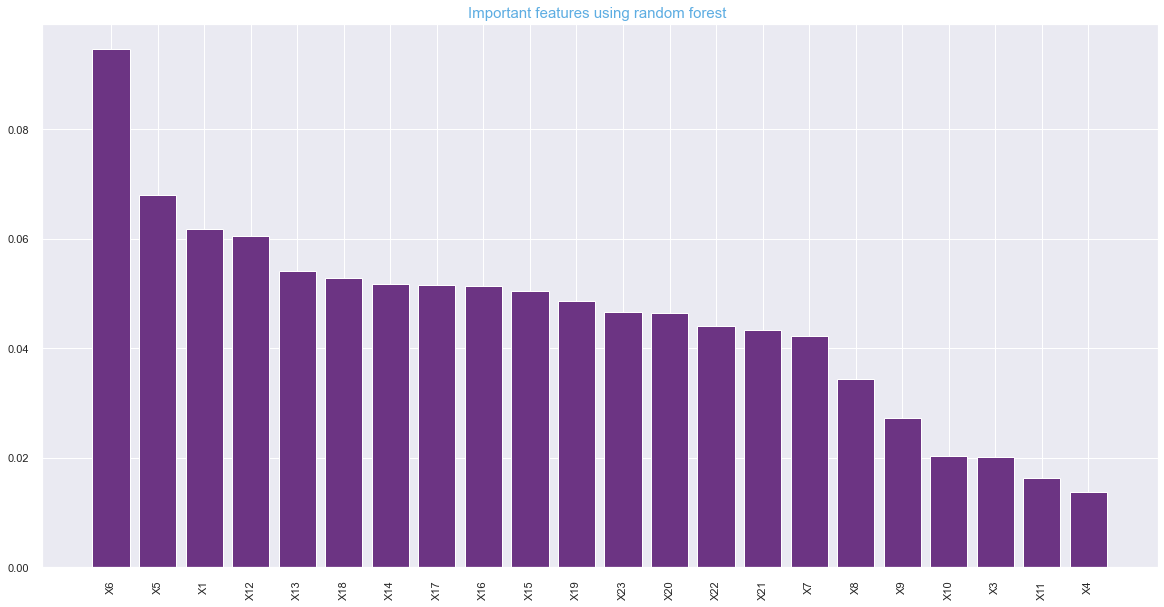

In [29]:
#random forest
sns.set()
plt.figure(figsize=(12,9))

# Instantiate the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

for i,v in zip(indices, importances[indices]):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Important features using random forest ", fontsize=15 , color="#5DADE2")

# Add bars
plt.bar(range(X.shape[1]), importances[indices] ,color="#6C3483")

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

<font color=#010190 size = 4> Based on this histogram we can see that X6 is the most important feature, while X3 and X4 are the least important ones.

<Font color="mercure" size = 5> Conclusion : 
    
<font color=#010190 size = 4> Based on the previous analyzes, we decided to drop 'X2','X7','X8','X9','X10','X11','X3','X4'.

In [30]:
# Specify X to be the feature columns only, and y to be the target column

X= dataset.drop(['X2','X7','X8','X9','X10','X11',
                 'X3', 'X4',
                 'Y'], axis=1)

# Specify y to be the target column
y = dataset['Y']
dataset3=dataset.drop(['X2','X7','X8','X9','X10','X11',
                 'X3', 'X4'], axis=1)
# Create the train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.75,
                                                    random_state=42,
                                                    stratify=y)



# Initiate the scaler
scaler = StandardScaler()

# Fit and transform the X_train data
X_train_std = scaler.fit_transform(X_train)

# Apply the scaler that was fit to the X_train data to the X_test data
X_test_std = scaler.transform(X_test)

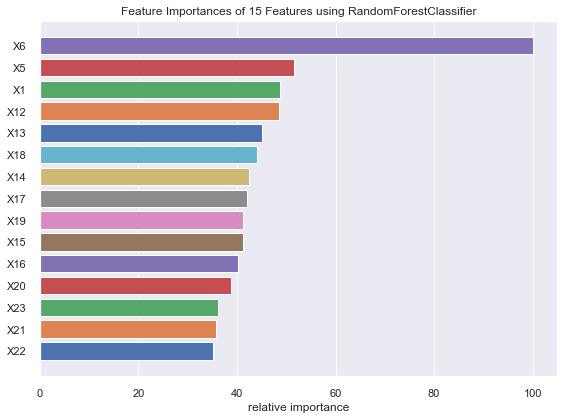

In [31]:
sns.set()
plt.figure(figsize=(8, 6))
model = RandomForestClassifier()
model.fit(X_train_std, y_train)
visualizer = FeatureImportances(model)
visualizer.fit(X_train, y_train)
visualizer.show();

<font color=#6C3483 size = 8> IV. Modeling

<font color=#010190 size = 4>this function is used to evaluate the models.


In [32]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)    
    plot_confusion_matrix(model, X_test, y_test,display_labels=dataset.Y.unique(),cmap=plt.cm.Blues)
    print(classification_report(y_test, ypred)) 

In [33]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

def evaluation_std(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train_std, y_train)
    ypred = model.predict(X_test_std)    
    plot_confusion_matrix(model, X_test_std, y_test,display_labels=dataset.Y.unique(),cmap=plt.cm.Blues)
    print(classification_report(y_test, ypred)) 

# K nearest neighbors (KNN)

K-Nearest Neighbors is a classification algorithm that classifies the given dataset into different groups or categories. And when a new data point is entered, the algorithm helps us to identify which group the new data point belongs to based on various similarity measures of its neighbors.

In [34]:
#we verify if our dataset is balanced or imbalanced
print(dataset.groupby('Y').size())

Y
0    23364
1     6636
dtype: int64


23364 of the observations are 0 and 6636 are 1 so the dataset is balanced.
if the data set was imbalanced, meaning that for example 98% of the observations are 0, Therefore, your predictor almost always predicts any given sample as belonging to class 0 and thereby achieves very high scores like precision 
and recall for class 0 and very low scores for class 1.

In [35]:
#Appliquer K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

#At first, we did a loop of k from 1  to 75, but the result is very heavy and the machine blocked, so we decided to
#choose random values (5,10,50,75) and compare them with confusion matrix and classification report
accuracies= []


K=5

In [36]:
# Create KNN classifier
#At first, we chose K=5, that means that a new data point is labeled with by majority from the 5 nearest points.
knn = KNeighborsClassifier(n_neighbors = 5)
#Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as 
#parameters to fit our model to the training data.
# Fit the classifier to the data
knn.fit(X_train_std,y_train)

KNeighborsClassifier()

In [37]:
#The final step is to make predictions on our test data.
y_pred_knn = knn.predict(X_test_std)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      5841
           1       0.37      0.17      0.24      1659

    accuracy                           0.75      7500
   macro avg       0.58      0.55      0.54      7500
weighted avg       0.70      0.75      0.72      7500

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5841
           1       0.54      0.34      0.42      1659

    accuracy                           0.79      7500
   macro avg       0.68      0.63      0.64      7500
weighted avg       0.77      0.79      0.77      7500



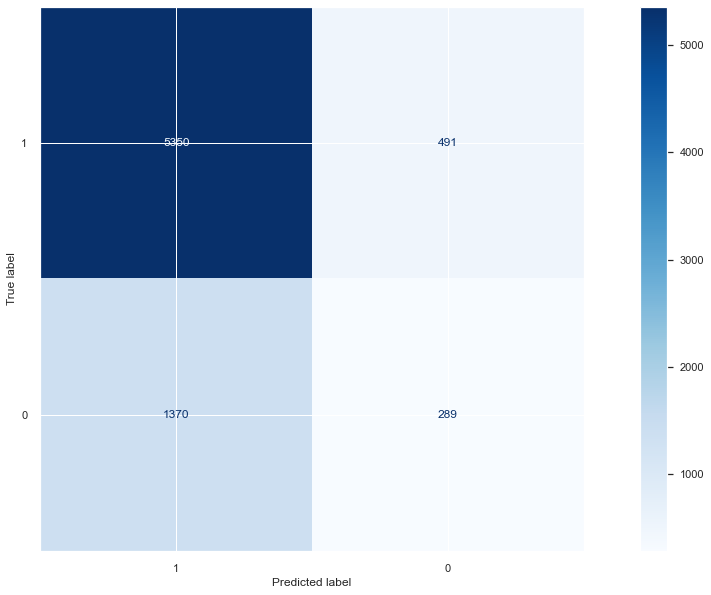

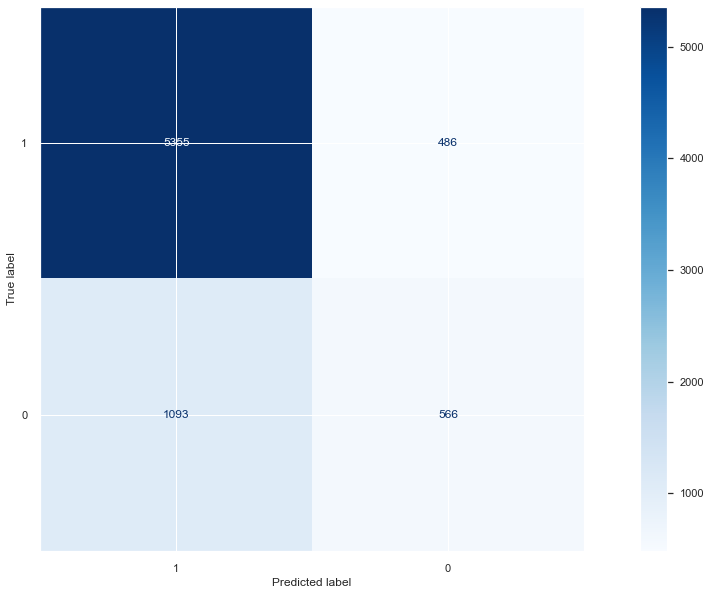

In [38]:
#Evaluating the algo
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred_knn, output_dict=True)
accuracies.append(report['accuracy'])
evaluation(knn)
evaluation_std(knn)


<font color=#010190 size = 4> The results show that our KNN algorithm was able to classify 7500 records in the test set with 79% accuracy, which is good.


K=10

In [39]:
# Create KNN classifier
#K=10, that means that a new data point is labeled with by majority from the 10 nearest points.
knn = KNeighborsClassifier(n_neighbors = 10)
#Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as 
#parameters to fit our model to the training data.
# Fit the classifier to the data
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
#The final step is to make predictions on our test data.
y_pred_knn = knn.predict(X_test_std)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5841
           1       0.43      0.08      0.14      1659

    accuracy                           0.77      7500
   macro avg       0.61      0.53      0.51      7500
weighted avg       0.71      0.77      0.71      7500

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5841
           1       0.63      0.31      0.41      1659

    accuracy                           0.81      7500
   macro avg       0.73      0.63      0.65      7500
weighted avg       0.78      0.81      0.78      7500



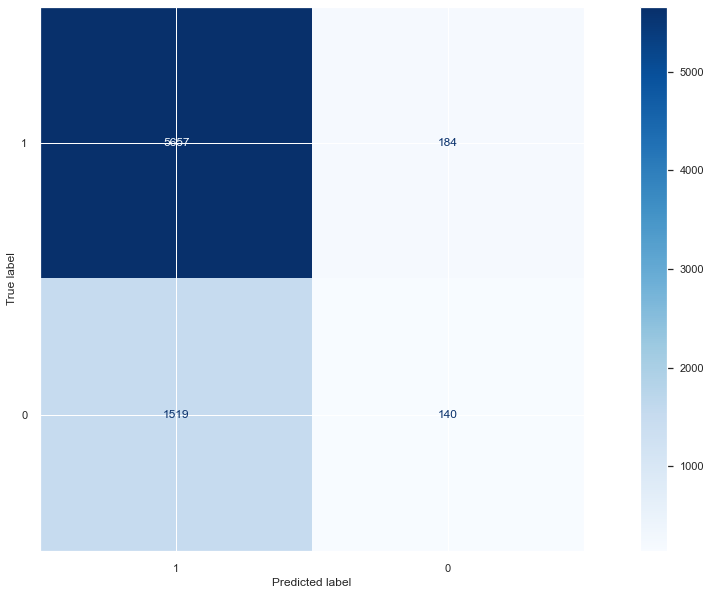

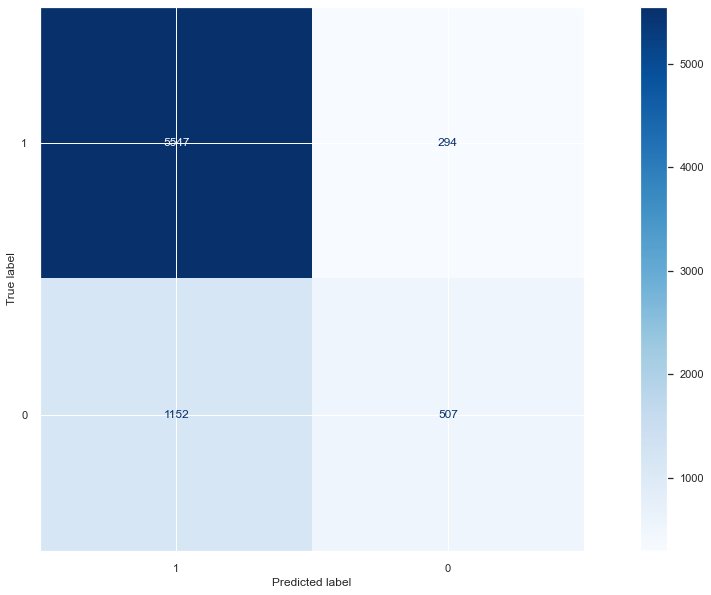

In [41]:
#Evaluating the algo
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred_knn, output_dict=True)
accuracies.append(report['accuracy'])
evaluation(knn)
evaluation_std(knn)


<font color=#010190 size = 4> The results show that our KNN algorithm was able to classify 7500 records in the test set with 81% accuracy, which is good and better than k=5.

<font color=#010190 size = 4> K=50

In [42]:
# Create KNN classifier
#K=50, that means that a new data point is labeled with by majority from the 50 nearest points.
knn = KNeighborsClassifier(n_neighbors = 50)
#Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as 
#parameters to fit our model to the training data.
# Fit the classifier to the data
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=50)

In [43]:
#The final step is to make predictions on our test data.
y_pred_knn = knn.predict(X_test_std)

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      5841
           1       0.47      0.05      0.10      1659

    accuracy                           0.78      7500
   macro avg       0.63      0.52      0.48      7500
weighted avg       0.71      0.78      0.70      7500

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5841
           1       0.67      0.33      0.44      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



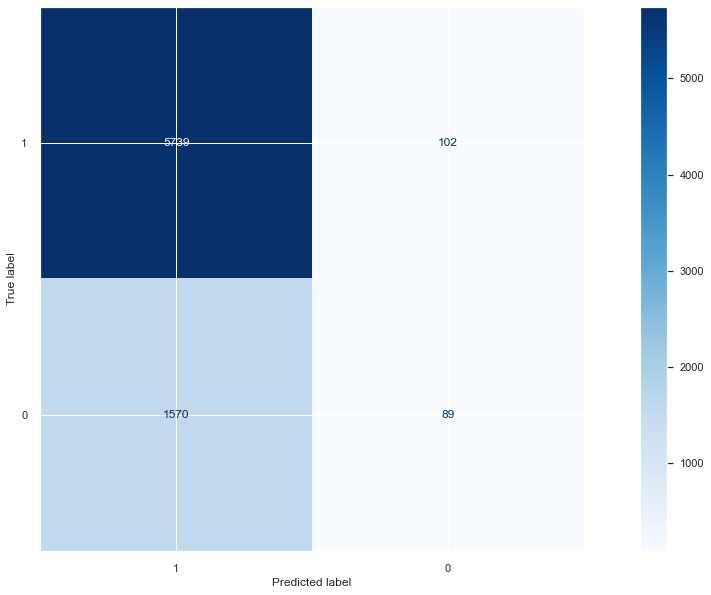

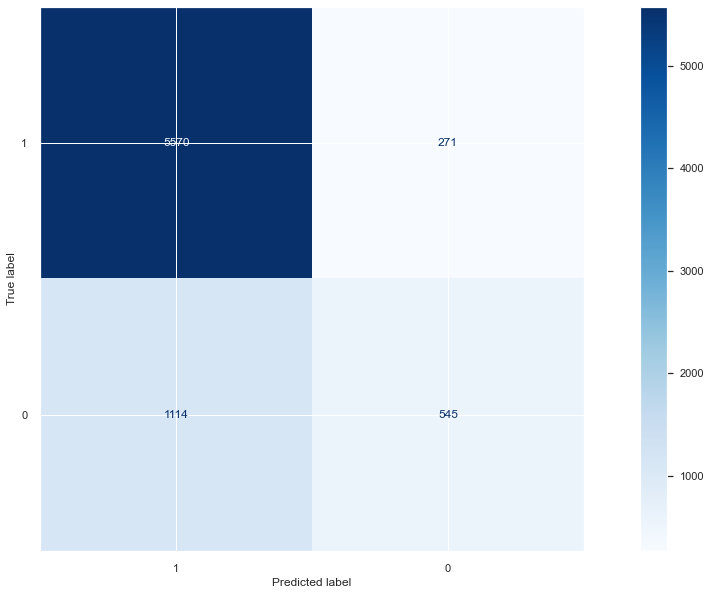

In [44]:
#Evaluating the algo
from sklearn.metrics import classification_report, confusion_matrix
y_pred_knn = knn.predict(X_test_std)
report = classification_report(y_test, y_pred_knn, output_dict=True)

accuracies.append(report['accuracy'])
evaluation(knn)
evaluation_std(knn)


<font color=#010190 size = 4> The results show that our KNN algorithm was able to classify 7500 records in 
the test set with 82% accuracy, which is good and better than k=10

<font color=#010190 size = 4> K=75

In [45]:
# Create KNN classifier
#K=75, that means that a new data point is labeled with by majority from the 75 nearest points.
knn = KNeighborsClassifier(n_neighbors = 75)
#Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as 
#parameters to fit our model to the training data.
# Fit the classifier to the data
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=75)

In [46]:
#The final step is to make predictions on our test data.
y_pred_knn = knn.predict(X_test_std)

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5841
           1       0.45      0.05      0.09      1659

    accuracy                           0.78      7500
   macro avg       0.62      0.52      0.48      7500
weighted avg       0.71      0.78      0.70      7500

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.68      0.32      0.44      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



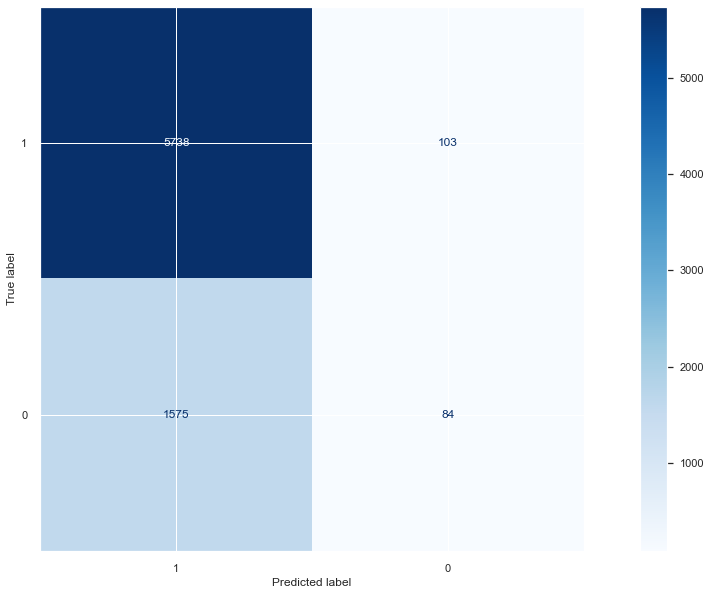

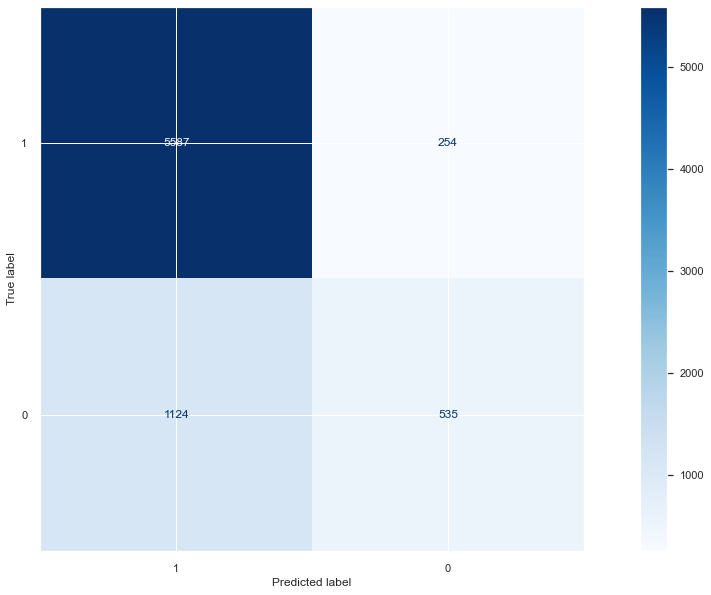

In [47]:
#Evaluating the algo
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred_knn, output_dict=True)
accuracies.append(report['accuracy'])
evaluation(knn)
evaluation_std(knn)


<font color=#010190 size = 4> The results show that our KNN algorithm was able to classify 7500 records in 
the test set with 82% accuracy, which is same as k=50

In [48]:
#Based on the performance metrics below, we will choose overall accuracy. Since our data is balanced, 
#meaning a split between 50/50 true and negative samples, I can choose accuracy. 

Text(0, 0.5, 'Accuracy')

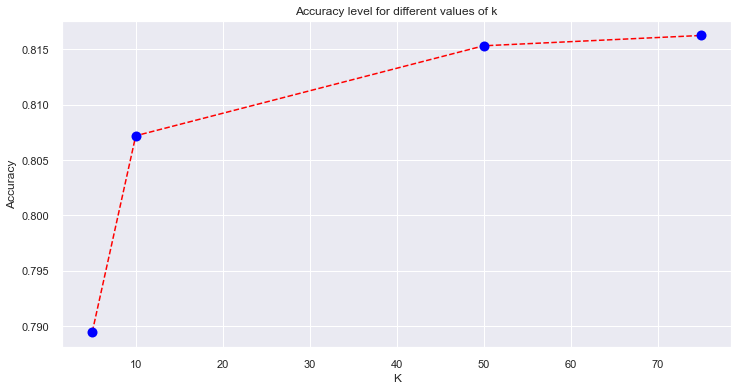

In [49]:
plt.figure(figsize=(12, 6))
plt.plot([5,10,50,75], accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy level for different values of k')
plt.xlabel('K')
plt.ylabel('Accuracy')

<font color=#010190 size = 4> We can observe that the best accuracy is when k=75

In [50]:
#Now we will evalute the performance of KNN with ROC

from sklearn.metrics import roc_curve, auc
fprknn, tprknn, thresholdknn = roc_curve(y_test, y_pred_knn)
roc_aucknn = auc(fprknn, tprknn)

# Naive Baies

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features). 

              precision    recall  f1-score   support

           0       0.87      0.25      0.39      5841
           1       0.25      0.86      0.38      1659

    accuracy                           0.39      7500
   macro avg       0.56      0.56      0.39      7500
weighted avg       0.73      0.39      0.39      7500



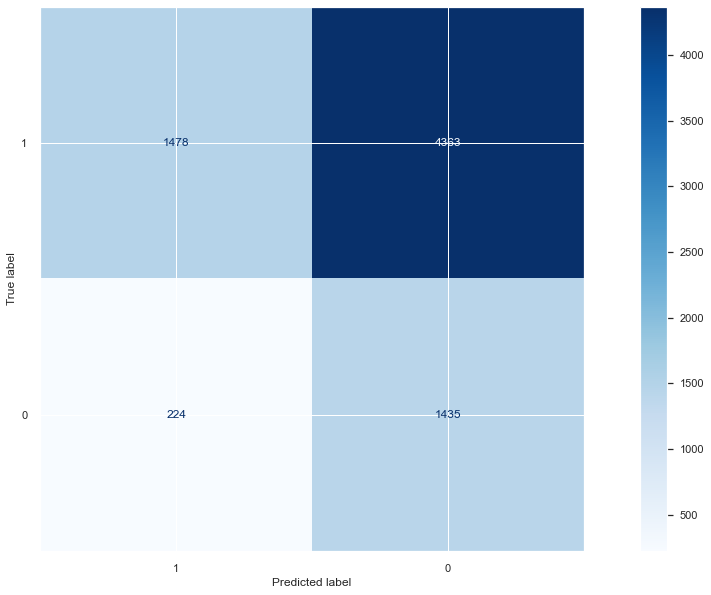

In [51]:
#importing library 
from sklearn.naive_bayes import GaussianNB
#implementing the model
GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)
#evaluating the model and building the confusion matrix
evaluation(GaussianNB)

In [52]:
from sklearn.metrics import roc_curve, auc
#calculating the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
y_pred_GB = GaussianNB.predict(X_test)
fprNB, tprNB, thresholdNB = roc_curve(y_test,y_pred_GB)
rocNB = auc(fprNB, tprNB)

<font color=#010190 size = 4>Based on the previous results, it can be observed that the average accuracy of the model is about 0.39 which means that the model didn't work well with our data.
That's why we tried to improve the model in order to obtain better results.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



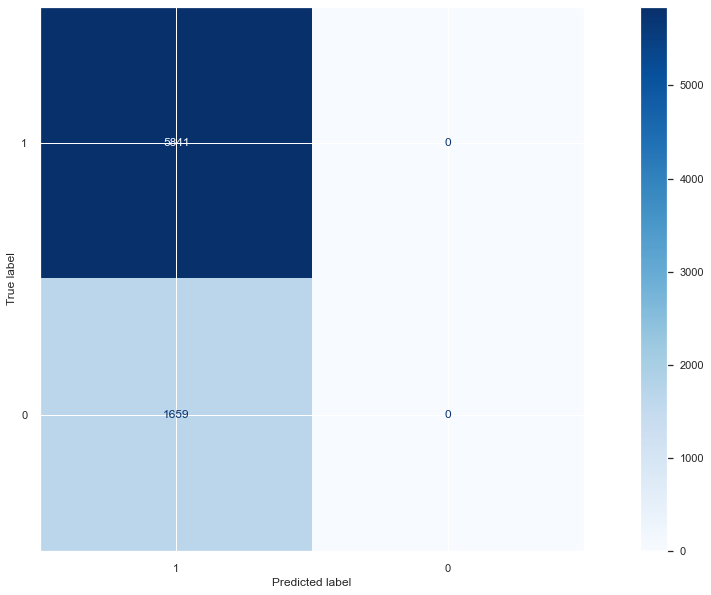

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#Define Grid Search Parameters
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

#Hyperparameter Tune using Training Data
grid_GB = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10)
grid_GB.fit(X_train,y_train)

#evaluating the model
evaluation(grid_GB.best_estimator_)

<font color=#010190 size = 4>The model has not power predicting default credit cards. However, it can be observed that the average accuracy of the model is about 78%, which demonstrates that this metrics is not appropriate for the evaluation of this problem.

# Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



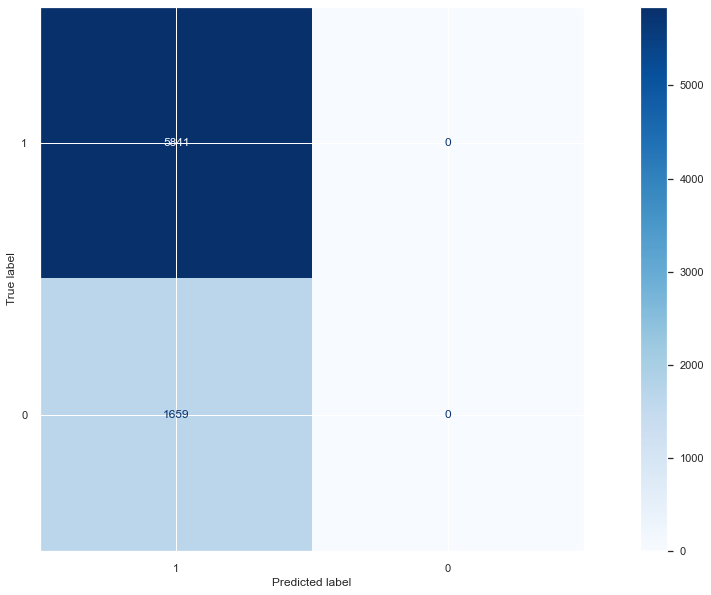

In [54]:
from sklearn.linear_model import LogisticRegression
#Appling the Logistic Regression Algorithm
LogisticRegression=LogisticRegression(solver='liblinear')
#evaluating the model
evaluation(LogisticRegression)


<font color=#010190 size = 4> The model has not power predicting Default card. However, it can be observed that the average accuracy of the model is about 78%, which demonstrates that this metrics is not appropriate for the evaluation of this problem.

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.72      0.26      0.39      1659

    accuracy                           0.81      7500
   macro avg       0.77      0.62      0.64      7500
weighted avg       0.80      0.81      0.78      7500



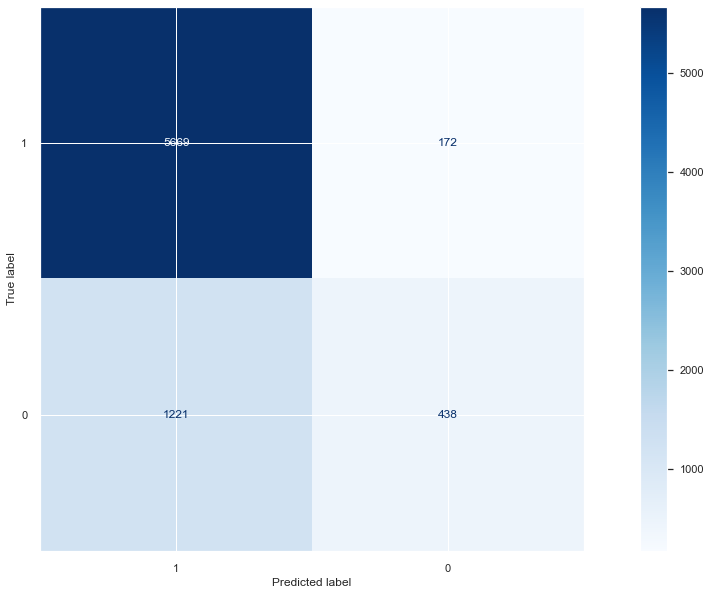

In [55]:
from sklearn.model_selection import GridSearchCV
#Applying the parameters of the grid
param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'max_iter': [100,1000, 2000, 3000]}
#Creating a new model using the GridSearch CV
grid_LogisticRegression=GridSearchCV(LogisticRegression,param_grid,cv=5)
grid_LogisticRegression.fit(X_train,y_train)
#evaluating the model
evaluation(grid_LogisticRegression.best_estimator_)



<font color=#010190 size = 4>The performance of the logistic regression model with GridSearch CV improved compared to the first  model . By using the GridSearch CV, the model is able to predict better; however, with a very low recall (0.26).


In [56]:
#ROC preapration 
ypred_reg= grid_LogisticRegression.best_estimator_.predict(X_test)
fprLR, tprLR, thresholdLR = roc_curve(y_test,ypred_reg)
rocLR = auc(fprLR, tprLR)
from sklearn import metrics

accuracy_AB=metrics.accuracy_score(y_test, ypred_reg)
print('Accuracy using LR+GS CV: ',accuracy_AB)



Accuracy using LR+GS CV:  0.8142666666666667


# Random Forest Classification

A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

In [57]:

from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators =25, random_state = 1)
rf_model_initial.fit(X_train,y_train)
rfc_predict = rf_model_initial.predict(X_test)
print("Random Forest accuracy for 25 trees is :",rf_model_initial.score(X_test,y_test))


Random Forest accuracy for 25 trees is : 0.8077333333333333


=== Confusion Matrix ===
[[5446  395]
 [1047  612]]


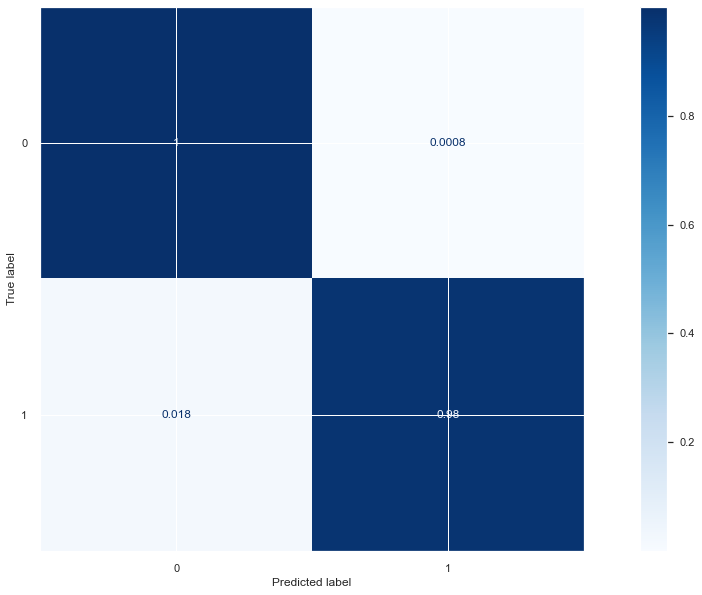

In [58]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(rf_model_initial, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rf_model_initial, X, y, cv=10, scoring="roc_auc")

In [60]:
y_pred_rf = rf_model_initial.predict(X_test)
fprRF, tprRF, thresholdRF = roc_curve(y_test,y_pred_rf)
rocRF = auc(fprRF, tprRF)

In [61]:
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5841
           1       0.61      0.37      0.46      1659

    accuracy                           0.81      7500
   macro avg       0.72      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500



=== All AUC Scores ===
[0.71052973 0.72019091 0.72745122 0.71090591 0.73978856 0.76263197
 0.7850498  0.74822596 0.76734492 0.76097548]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7433094460704062


# Decision Tree

Decision trees are useful tools, particularly for situations where financial data and probability of outcomes are relatively reliable. They are used to compare the costs and likely values of decision pathways that a business might take. They often include decision alternatives that lead to multiple possible outcomes, with the likelihood of each outcome being measured numerically.

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DecisionTree=DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5841
           1       0.39      0.41      0.40      1659

    accuracy                           0.72      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.73      0.72      0.73      7500



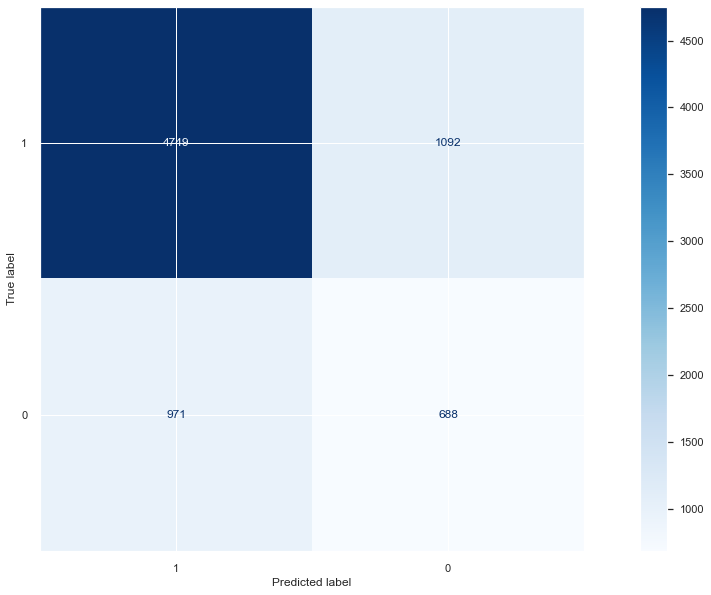

In [64]:
evaluation(DecisionTree)

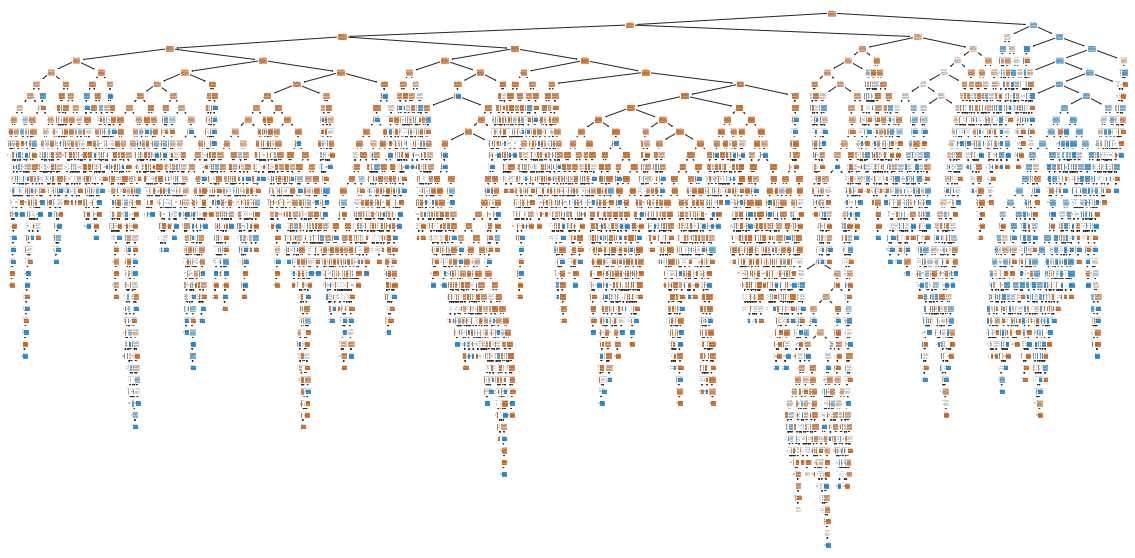

In [65]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(DecisionTree, feature_names=names, class_names=dataset3.columns, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5841
           1       0.70      0.31      0.43      1659

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



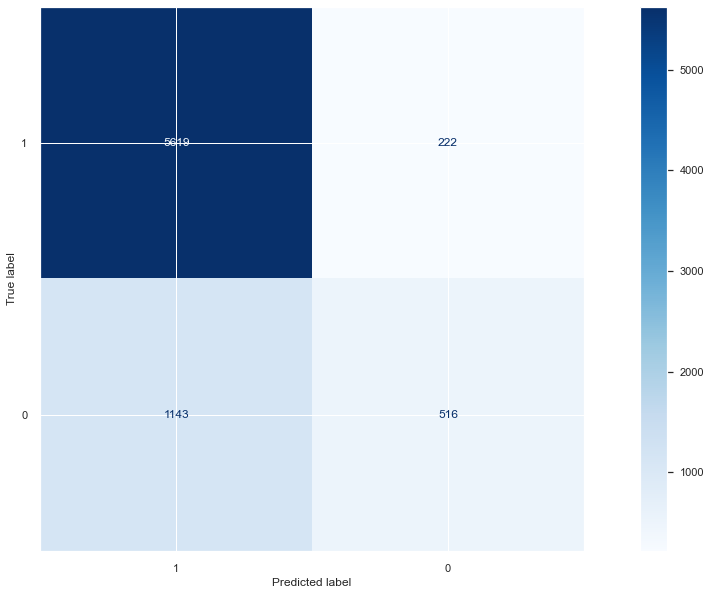

In [67]:
#Decision Tree with GridSearchCV 
from sklearn.model_selection import GridSearchCV
#Applying the parameters of the grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,4)}
#Creating a new model using the GridSearch CV
gridDecisionTree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=6)
gridDecisionTree.fit(X_train,y_train)
#evaluating the model
evaluation(gridDecisionTree.best_estimator_)

<font color=#010190 size = 4> By applying GridSearchCV we notice an increase of the  accuracy value from 0.72 to 0.82

In [68]:
# Roc
ypred_add = gridDecisionTree.best_estimator_.predict(X_test)
fprTree, tprTree, thresholdTree = roc_curve(y_test,ypred_add)
rocTree = auc(fprTree, tprTree)

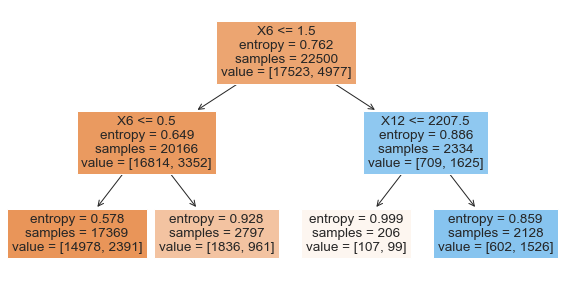

In [69]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(gridDecisionTree.best_estimator_, feature_names=dataset3.columns, filled=True)
plt.show()

# Adaboost

AdaBoost algorithm, is a Boosting technique used as an Ensemble Method in Machine Learning. 
It is called Adaptive Boosting ,as the weights 
are re-assigned to each instance, with higher weights assigned to incorrectly classihed instances.
Boosting is used to reduce bias as well as variance for supervised learning.

In [70]:
#Fit, predict
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,random_state=0)
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_adb = model1.predict(X_test)

 Evaluate Model :
 
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

In [71]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_adb))

AdaBoost Classifier Model Accuracy: 0.8178666666666666


In this case, we got an accuracy of 81.78%, which will be considered as a good accuracy.

In [72]:

#Evaluate the model using accuracy and confusion matrix
acc_AB=metrics.accuracy_score(y_test, y_pred_adb)

print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_pred_adb))

Confusion Matrix: 
 [[5568  273]
 [1093  566]]


5568: true positive; meaning the clients who are not defaulted were correcty predicted as such.


566: true negative; meaning the clients who are defaulted were correcty predicted as such.

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.67      0.34      0.45      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



In [74]:
print (f'Train Accuracy - : {abc.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {abc.score(X_test,y_test):.3f}')

Train Accuracy - : 0.821
Test Accuracy - : 0.818


In [75]:
fpradb, tpradb, thresholdadb = roc_curve(y_test, y_pred_adb)
roc_auc_adb = auc(fpradb, tpradb)

# Neural Network

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

In [76]:
# sequential model to initialise our ann and dense module to build the layers
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [77]:
hl   = 5                   # number of hidden layer
nohl = [50,40,30,20,10]     # number of neurons in each hidden layer
from keras.initializers import glorot_uniform

classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))

# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 4,911
Trainable params: 4,911
Non-trainable params: 0
______________________________________________________

In [79]:
classifier.fit(X_train_std, y_train, epochs=100, batch_size=512)


Epoch 1/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7430
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7810
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8180
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8181
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8188
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8185
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8198
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8192
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8201
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8209
Epoch 11/

In [80]:
y_predANN = classifier.predict(X_test_std)
y_predANN = (y_predANN > 0.5)
conf_matr = confusion_matrix(y_test, y_predANN)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)
print(classification_report(y_test, y_predANN)) 

Confusion Matrix : 
[[5572  269]
 [1118  541]]

True Positive (TP)  :  5572
False Positive (FP) :  269
True Negative (TN)  :  541
False Negative (FN) :  1118
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5841
           1       0.67      0.33      0.44      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



In [81]:
acc = (TP+TN)/(TP+TN+FP+FN)
print('By this metric, only '+ str(round(acc*100)) + '% of them are correctly predicted.')

By this metric, only 82% of them are correctly predicted.


In [82]:
#ROC preapration 
fprANN, tprANN, thresholdANN = roc_curve(y_test,y_predANN)
rocANN = auc(fprANN, tprANN)


In [83]:
rocANN

0.6400231511795553

In [84]:
pre = TP/(TP+FP)
print('From those classification result, by calculating the precision, there are '+ str(round(pre*100)) + '% of them who are actually pay the credit.')


From those classification result, by calculating the precision, there are 95% of them who are actually pay the credit.


<font color=#6C3483 size = 8> V. Evaluation

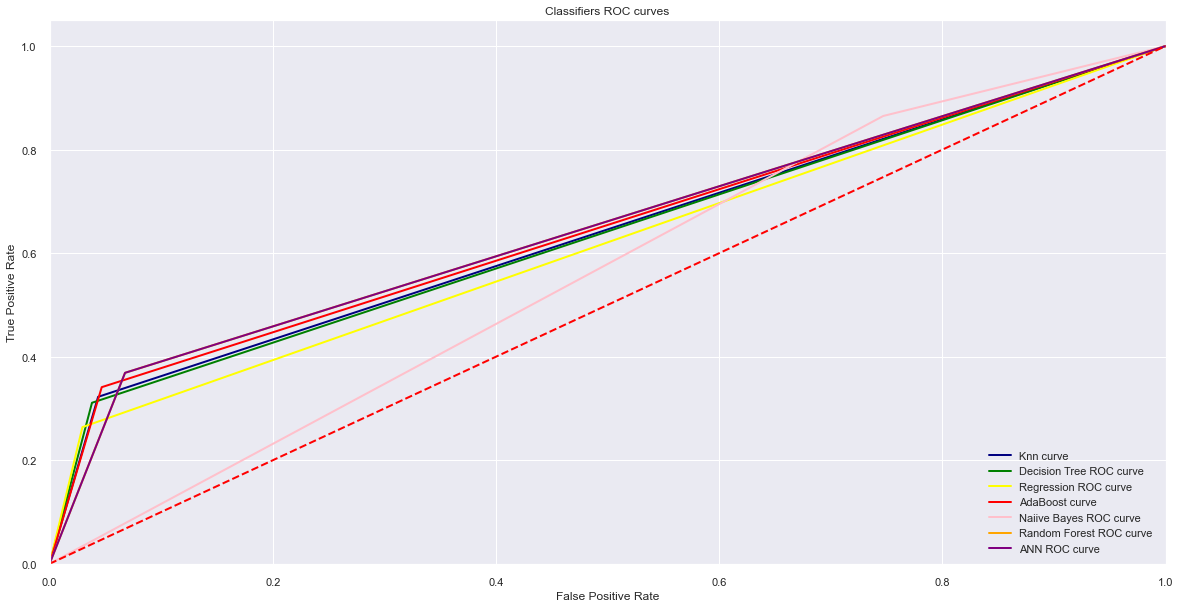

In [87]:
#Creating a new figure
plt.figure() 
#Adding the different curves of the six  predictive models elaborated in fourth part
plt.plot(fprknn, tprknn, color='navy', lw=2, label='Knn curve '% roc_aucknn)
plt.plot(fprTree, tprTree, color='green', lw=2, label='Decision Tree ROC curve '% rocTree)
plt.plot(fprLR, tprLR, color='yellow', lw=2, label='Regression ROC curve '% rocLR)
plt.plot(fpradb, tpradb, color='red', lw=2, label='AdaBoost curve '% roc_auc_adb)
plt.plot(fprNB, tprNB, color='pink', lw=2, label='Naiive Bayes ROC curve '% rocNB)
plt.plot(fprRF, tprRF, color='orange', lw=2, label='Random Forest ROC curve '% rocRF)
plt.plot(fprRF, tprRF, color='purple', lw=2, label='ANN ROC curve '% rocANN)

#adding the reference line (0.5)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

<font color=#010190 size = 4> We  investigated six predictive models:

<font color=#010190 size = 4>We started with KNeighborsClassifier model  (K nearest neighbors), for which we obtained an AUC score of 0.64.

<font color=#010190 size = 4>Next we used an DecisionTreeClassifier model, with a similar AUC score (0.64).
<font color=#010190 size = 4>then we used an AdaBoostClassifier model and followed with an RandomForrestClassifier model , with a higher AUC score (0.65).
<font color=#010190 size = 4>Also we used LogisticRegression model, with lower AUC score (0.62).
<font color=#010190 size = 4>Next we used a Naive Baies model, with lower AUC score (0.56).

<font color=#010190 size = 4>It is evident from the plot that the AUC for the Neural Network ROC curve is higher than the other's ROC curve. Therefore, we can say ANN did a better job of classifying the positive class in the dataset.